8.1 Hierarchical Indexing

In [2]:
import pandas as pd
import numpy as np

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_38089/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data= pd.DataFrame(np.arange(9), 
                   index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                            [1, 2, 3, 1, 3, 1, 2, 2, 3]])

data

0
a 1  0
  2  1
  3  2
b 1  3
  3  4
c 1  5
  2  6
d 2  7
  3  8

In [4]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [5]:
data.loc['b']

,0
1,3
3,4


In [6]:
data.loc['b':'c']

0
b 1  3
  3  4
c 1  5
  2  6

In [10]:
data.loc[['b', 'a']]

0
b 1  3
  3  4
a 1  0
  2  1
  3  2

In [11]:
data.loc[:, 2]

KeyError: 2

Till here , we were working on Datframe directly. Its indexing is different than series.\
Lets try with Series

In [31]:
data= pd.Series(np.random.randn(9), 
                   index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                            [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1   -1.343701
   2   -1.307063
   3    1.026240
b  1    0.068078
   3    0.356869
c  1    0.448843
   2    0.663681
d  2   -0.716010
   3   -0.933179
dtype: float64

In [15]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [16]:
data['b']

1    0.713074
3    1.868927
dtype: float64

In [19]:
data[['b','c']]

b  1    0.713074
   3    1.868927
c  1    1.476211
   2   -0.702529
dtype: float64

In [20]:
data['b':'c']

b  1    0.713074
   3    1.868927
c  1    1.476211
   2   -0.702529
dtype: float64

In [21]:
data[:, 2]

a   -0.687640
c   -0.702529
d   -2.182627
dtype: float64

In [70]:
data= pd.Series(np.random.randn(9), 
                   index=[['k']*9,['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                            [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

k  a  1    1.171308
      2   -0.287969
      3   -0.793651
   b  1   -0.434893
      3   -0.486164
   c  1    0.058069
      2   -1.317483
   d  2   -0.051576
      3   -1.106929
dtype: float64

In [24]:
data[::2]

k  a  1    0.238291
      3   -0.597279
   b  3   -0.428439
   c  2   -0.351136
   d  3    1.427966
dtype: float64

In [29]:
data.unstack()

1         2         3
k a -1.173960  0.336635 -1.382432
  b  0.971030       NaN  0.289150
  c  0.744384  0.104594       NaN
  d       NaN  0.257228  0.921321

In [30]:
data.unstack().stack()

k  a  1   -1.173960
      2    0.336635
      3   -1.382432
   b  1    0.971030
      3    0.289150
   c  1    0.744384
      2    0.104594
   d  2    0.257228
      3    0.921321
dtype: float64

In [33]:
#Either axis can have hierarical index

frame= pd.DataFrame((np.arange(12).reshape(4,3)), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=[['Ohio', 'Ohio', 'Colorado'],
         ['Green', 'Red', 'Green']])

frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [35]:
#naming the indexes

frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']

In [36]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [38]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [41]:
#Sorting or reordering Levels
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [43]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [44]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [55]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [47]:
frame.swaplevel(0,1).sort_index(level=[1,0])

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [50]:
frame.sum(axis=1)

key1  key2
a     1        3
      2       12
b     1       21
      2       30
dtype: int64

In [73]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [87]:
frame.columns

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

In [85]:
frame.groupby(level='key1').sum()

state  Ohio     Colorado
color Green Red    Green
key1                    
a         3   5        7
b        15  17       19

In [90]:
frame.groupby(level='state', axis= 1).sum()

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_38089/3987863713.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  frame.groupby(level='state', axis= 1).sum()


state      Colorado  Ohio
key1 key2                
a    1            2     1
     2            5     7
b    1            8    13
     2           11    19

In [91]:
#how to do different level sums?

In [105]:
frame.sum(axis=1).groupby('key1').sum()


key1
a    15
b    51
dtype: int64

In [110]:
frame.groupby(level=['key1']).sum().sum(axis=1) #multiple sum will lead to each addition step.


key1
a    15
b    51
dtype: int64

Indexing with a DataFrame’s columns

In [111]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
         'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
'd': [0, 1, 2, 0, 1, 2, 3]})     

frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [114]:
frame.set_index(['c', 'd'])

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [115]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [118]:
frame2 = frame.set_index(['c','d'])

In [119]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [120]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


8.2 Combining and Merging Datasets

• pandas.merge connects rows in DataFrames based on one or more keys.\
 This will be familiar to users of SQL or other relational databases, as it implements database join operations.\
• pandas.concat concatenates or “stacks” together objects along an axis.\
• The combine_first instance method enables splicing together overlapping data\
to fill in missing values in one object with values from another.\

In [121]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                         'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [122]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [123]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [124]:
df1.merge(df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [125]:
pd.merge(df1,df2,on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [128]:
pd.merge(df2,df1,on='key')

,key,data2,data1
0,a,0,2
1,a,0,4
2,a,0,5
3,b,1,0
4,b,1,1
5,b,1,6


In [129]:
#if key names do not match

df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                            'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})

In [131]:
pd.merge(df3, df4, left_on= 'lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,a,2,a,0
3,a,4,a,0
4,a,5,a,0
5,b,6,b,1


pd.merge is an inner join by default

In [132]:
pd.merge(df3, df4, left_on= 'lkey', right_on='rkey', how= 'left')

,lkey,data1,rkey,data2
0,b,0,b,1.0
1,b,1,b,1.0
2,a,2,a,0.0
3,c,3,NaN,NaN
4,a,4,a,0.0
5,a,5,a,0.0
6,b,6,b,1.0


In [133]:
pd.merge(df3, df4, left_on= 'lkey', right_on='rkey', how= 'outer')

,lkey,data1,rkey,data2
0,a,2.0,a,0.0
1,a,4.0,a,0.0
2,a,5.0,a,0.0
3,b,0.0,b,1.0
4,b,1.0,b,1.0
5,b,6.0,b,1.0
6,c,3.0,NaN,NaN
7,NaN,NaN,d,2.0


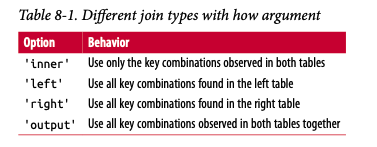

In [134]:
#many to many merges

df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                  'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})

In [135]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [136]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [137]:
pd.merge(df1,df2, how='inner', on= 'key')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,a,4,0
7,a,4,2
8,b,5,1
9,b,5,3


In [138]:
#same concept as joins

In [139]:
# join on multiple keys

left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                        'key2': ['one', 'two', 'one'],
                       'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                           'key2': ['one', 'one', 'one', 'two'],
                     'rval': [4, 5, 6, 7]})




In [140]:
left.merge(right, how= 'outer', on= ['key1', 'key2'])

,key1,key2,lval,rval
0,bar,one,3.0,6.0
1,bar,two,NaN,7.0
2,foo,one,1.0,4.0
3,foo,one,1.0,5.0
4,foo,two,2.0,NaN


In [141]:
#When you’re joining columns-on-columns, the indexes on the passed DataFrame objects are discarded.

In [142]:
left.merge(right, how= 'outer', on= ['key1'])

,key1,key2_x,lval,key2_y,rval
0,bar,one,3,one,6
1,bar,one,3,two,7
2,foo,one,1,one,4
3,foo,one,1,one,5
4,foo,two,2,one,4
5,foo,two,2,one,5


In [143]:
left.merge(right, how= 'outer', on= ['key1'], suffixes=['_left', '_right'])

,key1,key2_left,lval,key2_right,rval
0,bar,one,3,one,6
1,bar,one,3,two,7
2,foo,one,1,one,4
3,foo,one,1,one,5
4,foo,two,2,one,4
5,foo,two,2,one,5


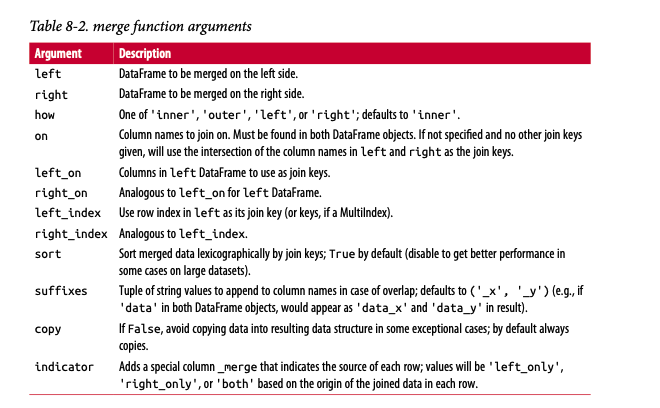

Merging on Index

In [144]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                             'value': range(6)})

right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])


In [145]:
left1 #key as column

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [147]:
right1 #key is index

,group_val
a,3.5
b,7.0


In [149]:
left1.merge(right1, how='left', left_on= 'key', right_index= True)

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


Joining on hierarical data

In [151]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio','Nevada', 'Nevada'],
'key2': [2000, 2001, 2002, 2001, 2002],
'data': np.arange(5.)})

lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [152]:
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
        'Ohio', 'Ohio'],
       [2001, 2000, 2000, 2000, 2001, 2002]],
columns=['event1', 'event2'])


righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [156]:
pd.merge(lefth, righth, left_on= ['key1', 'key2'], right_index= True, how= 'outer').sort_index()

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2000,NaN,2.0,3.0
4,Nevada,2002,4.0,NaN,NaN


In [158]:
#if both of the dfs has to be joined on index then just use right_index = True and left_index = True together

In [162]:
left2 = pd.DataFrame([[1,2],[4,9],[9,5]], index= ['a', 'c', 'd'], columns=['Ohio', 'Nevada'])

In [163]:
left2

,Ohio,Nevada
a,1,2
c,4,9
d,9,5


In [161]:
np.array([[1,2],[4,9],[9,5]])

array([[1, 2],
       [4, 9],
       [9, 5]])

In [166]:
left2 = pd.DataFrame([[1,2,4,9,9,5]])
left2

,0,1,2,3,4,5
0,1,2,4,9,9,5


In [167]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                          index=['a', 'c', 'e'],
                      columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                           index=['b', 'c', 'd', 'e'],
                     columns=['Missouri', 'Alabama'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [168]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [169]:
#doing join on indexes
left2.merge(right2, how= 'outer', left_index= True, right_index=True)


,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


JOIN IS USED WHEN THERE ARE NO OVERLAPPING COLUMNS. join is an instance. Always has to be like df.join...\
JOIN merges on index\
multiple joins can happen with JOIN

In [171]:
left2.join(right2, how= 'outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [172]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [173]:
right1

,group_val
a,3.5
b,7.0


In [175]:
left1.join(right1, how= 'outer') #join works only for index join and not for column key

,key,value,group_val
0,a,0.0,NaN
1,b,1.0,NaN
2,a,2.0,NaN
3,a,3.0,NaN
4,b,4.0,NaN
5,c,5.0,NaN
a,NaN,NaN,3.5
b,NaN,NaN,7.0


DEFAULT JOIN IS A LEFT JOIN

In [176]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                              index=['a', 'c', 'e', 'f'],
                            columns=['New York', 'Oregon'])

left2.join([right2,another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


Again, join is a left join

Concatenating Along an Axis

In [177]:
arr= np.arange(12).reshape(3,4)

np.concatenate([arr,arr], axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [179]:
np.concatenate([arr,arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [182]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [183]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [184]:
pd.concat([s1,s2,s3], axis= 1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [185]:
s4= pd.concat([s1,s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [186]:
pd.concat([s1,s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [188]:
pd.concat([s1,s4], axis=1, join = 'inner')

,0,1
a,0,0
b,1,1


In [195]:
pd.concat([s1,s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [198]:
# pd.concat?

pd.concat([s1,s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [199]:
s1,s2,s3

(a    0
 b    1
 dtype: int64,
 c    2
 d    3
 e    4
 dtype: int64,
 f    5
 g    6
 dtype: int64)

In [205]:
pd.concat([s1,s2,s3], keys= ['one', 'two', 'three'])

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [206]:
pd.concat([s1,s2,s3], keys= ['one', 'two', 'three']).unstack()

,a,b,c,d,e,f,g
one,0.0,1.0,NaN,NaN,NaN,NaN,NaN
two,NaN,NaN,2.0,3.0,4.0,NaN,NaN
three,NaN,NaN,NaN,NaN,NaN,5.0,6.0


In [207]:
pd.concat([s1,s2,s3],axis= 1, keys= ['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [208]:
pd.concat([s1,s2,s3],axis= 1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [209]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['a', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [211]:
pd.concat([s1,s2,s3],axis= 1, keys= ['o', 't', 'th'])

,o,t,th
a,0.0,2.0,NaN
b,1.0,NaN,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [212]:
s2

a    2
d    3
e    4
dtype: int64

Using concat for Dataframe objects

In [213]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                     columns=['one', 'two'])

In [214]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [215]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                       columns=['three', 'four'])

In [216]:
df2

,three,four
a,5,6
c,7,8


In [220]:
pd.concat([df1,df2], keys= ['oe', 'to'])

one  two  three  four
oe a  0.0  1.0    NaN   NaN
   b  2.0  3.0    NaN   NaN
   c  4.0  5.0    NaN   NaN
to a  NaN  NaN    5.0   6.0
   c  NaN  NaN    7.0   8.0

In [232]:
pd.concat([df1,df2], keys= ['oe', 'to'])

one  two  three  four
oe a  0.0  1.0    NaN   NaN
   b  2.0  3.0    NaN   NaN
   c  4.0  5.0    NaN   NaN
to a  NaN  NaN    5.0   6.0
   c  NaN  NaN    7.0   8.0

In [233]:
pd.concat([df1,df2], axis=1 ,keys= ['oe', 'to'])

oe        to     
  one two three four
a   0   1   5.0  6.0
b   2   3   NaN  NaN
c   4   5   7.0  8.0

In [237]:
pd.concat([df1,df2], keys= ['oe', 'to']).unstack([0])

one      two     three      four     
    oe  to   oe  to    oe   to   oe   to
a  0.0 NaN  1.0 NaN   NaN  5.0  NaN  6.0
b  2.0 NaN  3.0 NaN   NaN  NaN  NaN  NaN
c  4.0 NaN  5.0 NaN   NaN  7.0  NaN  8.0

Different ways

In [238]:
pd.concat({'level1':df1, 'level2':df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [242]:
frame= pd.concat([df1,df2], axis= 1, names=['upper', 'lower'], keys=['one','two'] )

In [245]:
frame.index=frame.index.set_names('alpha')

In [246]:
frame

upper one       two     
lower one two three four
alpha                   
a       0   1   5.0  6.0
b       2   3   NaN  NaN
c       4   5   7.0  8.0

In [247]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [253]:
df1

,a,b,c,d
0,-0.993075,-2.199743,0.373782,0.638942
1,-2.501197,0.387535,1.416904,0.649016
2,-0.137973,1.674035,-0.117662,2.432956


In [254]:
df2

,b,d,a
0,-2.154684,-1.732562,-0.502403
1,-0.149809,0.669608,2.854207


In [257]:
df1

,a,b,c,d
0,-0.993075,-2.199743,0.373782,0.638942
1,-2.501197,0.387535,1.416904,0.649016
2,-0.137973,1.674035,-0.117662,2.432956


In [258]:
df2

,b,d,a
0,-2.154684,-1.732562,-0.502403
1,-0.149809,0.669608,2.854207


In [261]:
df1[['a']].join(df2) #join only works for frames having non overlapping columns

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/saurabhverma/Documents/GitHub/My_python_journey/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_38089/4136076543.py", line 1, in <module>
    df1[['a']].join(df2)
  File "/Users/saurabhverma/Documents/GitHub/My_python_journey/.venv/lib/python3.9/site-packages/pandas/core/frame.py", line 10730, in join
    raise ValueError("Other Series must have a name")
  File "/Users/saurabhverma/Documents/GitHub/My_python_journey/.venv/lib/python3.9/site-packages/pandas/core/reshape/merge.py", line 184, in merge
    return op.get_result(copy=copy)
  File "/Users/saurabhverma/Documents/GitHub/My_python_journey/.venv/lib/python3.9/site-packages/pandas/core/reshape/merge.py", line 888, in get_result
    result = self._reindex_and_concat(
  File "/Users/saurabhverma/Documents/GitHub/My_python

In [262]:
df1[['c']].join(df2)

,c,b,d,a
0,0.373782,-2.154684,-1.732562,-0.502403
1,1.416904,-0.149809,0.669608,2.854207
2,-0.117662,NaN,NaN,NaN


In [263]:
# When you want to ignore index after concating

pd.concat([df1,df2])

,a,b,c,d
0,-0.993075,-2.199743,0.373782,0.638942
1,-2.501197,0.387535,1.416904,0.649016
2,-0.137973,1.674035,-0.117662,2.432956
0,-0.502403,-2.154684,NaN,-1.732562
1,2.854207,-0.149809,NaN,0.669608


In [264]:
pd.concat([df1,df2], ignore_index=True)

,a,b,c,d
0,-0.993075,-2.199743,0.373782,0.638942
1,-2.501197,0.387535,1.416904,0.649016
2,-0.137973,1.674035,-0.117662,2.432956
3,-0.502403,-2.154684,NaN,-1.732562
4,2.854207,-0.149809,NaN,0.669608


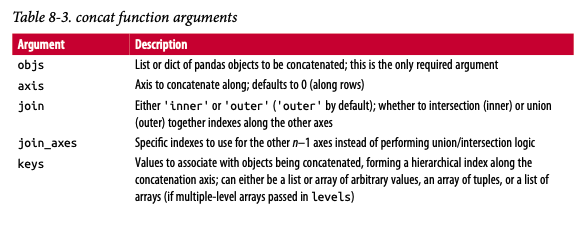

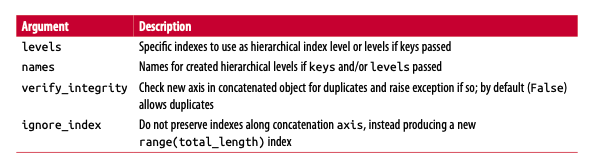

Combining Data with Overlap

In [265]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
             index=['f', 'e', 'd', 'c', 'b', 'a'])

b = pd.Series(np.arange(len(a), dtype=np.float64),
             index=['f', 'e', 'd', 'c', 'b', 'a'])


In [268]:
a[2:]

d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [269]:
b[:-2]

f    0.0
e    1.0
d    2.0
c    3.0
dtype: float64

In [270]:
#combine_first function

b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [271]:
#The same thing can be done with columns
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                      'b': [np.nan, 2., np.nan, 6.],
                      'c': range(2, 18, 4)})


df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                       'b': [np.nan, 3., 4., 6., 8.]})


In [272]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [273]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [274]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


8.3 Reshaping and Pivoting  -- Rearranging tabular data

In [275]:
#Reshaping with hierarical Indexing

stack - rotates or pivots from columns to rows\
unstack - rotates from rows to columns

In [276]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                         index=pd.Index(['Ohio', 'Colorado'], name='state'),
                         columns=pd.Index(['one', 'two', 'three'],
                         name='number'))

data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [277]:
data.stack() #from columns to rows

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [281]:
data.stack().unstack() #from rows to columns

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [279]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [282]:
#By default innermost level gets unstacked but you can unstack using levels (0,1,2 etc)


In [283]:
result = data.stack()

In [284]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [286]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [287]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [288]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [289]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [290]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [292]:
data2.unstack()  #adds nan values but if i do stack again, it remoives the nan to make it more invertible

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [293]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [294]:
# To avoid dropping na values, use dropna= False 
data2.unstack().stack(dropna= False)

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_38089/3328578540.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data2.unstack().stack(dropna= False)


one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [295]:
#When you unstack in a DataFrame, the level unstacked becomes the lowest level

df = pd.DataFrame({'left': result, 'right': result + 5},
                 columns=pd.Index(['left', 'right'], name='side'))

df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [296]:
df.unstack()

side     left           right          
number    one two three   one two three
state                                  
Ohio        0   1     2     5   6     7
Colorado    3   4     5     8   9    10

In [297]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [298]:
df.unstack('state').stack('side')

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_38089/3997798123.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.unstack('state').stack('side')


state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10

Pivoting “Long” to “Wide” Format

In [299]:
data= pd.read_csv('example_files/macrodata.csv')
data.sample()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
119,1988,4,7733.991,5140.4,1007.371,783.065,5708.5,121.2,785.7,8.03,5.3,246.224,4.31,3.72


In [300]:
data.shape

(203, 14)

In [301]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [303]:
period = pd.PeriodIndex(year= data.year, quarter= data.quarter, name= 'date')

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_38089/2207877464.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  period = pd.PeriodIndex(year= data.year, quarter= data.quarter, name= 'date')


In [305]:
columns= pd.Index(['realgdp', 'infl', 'unemp'], name= 'item')

data= data.reindex(columns=columns)
data.index= period.to_timestamp('D', 'end')

In [306]:
data

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,13324.600,-3.16,6.0
2008-12-31 23:59:59.999999999,13141.920,-8.79,6.9
2009-03-31 23:59:59.999999999,12925.410,0.94,8.1


In [307]:
ldata= data.stack()

In [308]:
ldata

date                           item   
1959-03-31 23:59:59.999999999  realgdp     2710.349
                               infl           0.000
                               unemp          5.800
1959-06-30 23:59:59.999999999  realgdp     2778.801
                               infl           2.340
                                            ...    
2009-06-30 23:59:59.999999999  infl           3.370
                               unemp          9.200
2009-09-30 23:59:59.999999999  realgdp    12990.341
                               infl           3.560
                               unemp          9.600
Length: 609, dtype: float64

In [309]:
ldata= data.stack().reset_index()

In [310]:
ldata

,date,item,0
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [349]:
ldata= data.stack().reset_index().rename(columns= {0: 'value'})
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [355]:
ldata.set_index(['date', 'item']).unstack('item')

value                 
item                           infl    realgdp unemp
date                                                
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2
...                             ...        ...   ...
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6

[203 rows x 3 columns]

In [332]:
pivoted= ldata.pivot(index= 'date',columns='item', values='value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


The main difference between unstack and pivot is that pivot works for column names but unstack works on index, if a column is made index.

In [315]:
ldata.pivot?

Signature: ldata.pivot(*, columns, index=<no_default>, values=<no_default>) -> 'DataFrame'
Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
columns : str or object or a list of str
    Column to use to make new frame's columns.
index : str or object or a list of str, optional
    Column to use to make new frame's index. If not given, uses existing index.
values : str, object or a list of the previous, optional
    Column(s) to use for populating new frame's values. If not
    specified, all remaining columns will be used and the result will
    have hierarchically indexed columns.

Returns
-------
DataFrame
   

In [356]:
ldata.unstack?

Signature:
ldata.unstack(
    level: 'IndexLabel' = -1,
    fill_value=None,
    sort: 'bool' = True,
)
Docstring:
Pivot a level of the (necessarily hierarchical) index labels.

Returns a DataFrame having a new level of column labels whose inner-most level
consists of the pivoted index labels.

If the index is not a MultiIndex, the output will be a Series
(the analogue of stack when the columns are not a MultiIndex).

Parameters
----------
level : int, str, or list of these, default -1 (last level)
    Level(s) of index to unstack, can pass level name.
fill_value : int, str or dict
    Replace NaN with this value if the unstack produces missing values.
sort : bool, default True
    Sort the level(s) in the resulting MultiIndex columns.

Returns
-------
Series or DataFrame

See Also
--------
DataFrame.pivot : Pivot a table based on column values.
DataFrame.stack : Pivot a level of the column labels (inverse operation
    from `unstack`).

Notes
-----
Reference :ref:`the user guide <resh

In [334]:
ldata['value2']= np.random.randn(len(ldata))
ldata

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.746370
1,1959-03-31 23:59:59.999999999,infl,0.000,-0.699992
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.040071
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,1.032398
4,1959-06-30 23:59:59.999999999,infl,2.340,-1.301828
...,...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370,0.849203
605,2009-06-30 23:59:59.999999999,unemp,9.200,-0.029666
606,2009-09-30 23:59:59.999999999,realgdp,12990.341,-0.282552
607,2009-09-30 23:59:59.999999999,infl,3.560,-0.457956


In [336]:
pivoted= ldata.pivot(index= 'date', columns='item')
pivoted

value                     value2            \
item                           infl    realgdp unemp      infl   realgdp   
date                                                                       
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8 -0.699992 -0.746370   
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1 -1.301828  1.032398   
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3 -1.775210 -1.825283   
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6  1.632574 -0.613500   
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2 -0.908877  0.555239   
...                             ...        ...   ...       ...       ...   
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0 -0.520653 -0.669352   
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9  1.642832 -1.444728   
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1  0.862306 -0.563240   
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2  0.849203  1.461251   
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6 -0.457956 -0.282552   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.040071  
1959-06-30 23:59:59.999999999 -1.204884  
1959-09-30 23:59:59.999999999  0.445218  
1959-12-31 23:59:59.999999999 -0.300913  
1960-03-31 23:59:59.999999999 -1.221062  
...                                 ...  
2008-09-30 23:59:59.999999999 -1.470738  
2008-12-31 23:59:59.999999999 -0.742303  
2009-03-31 23:59:59.999999999  0.675275  
2009-06-30 23:59:59.999999999 -0.029666  
2009-09-30 23:59:59.999999999  0.178240  

[203 rows x 6 columns]

In [348]:
ldata.set_index(['date', 'item']).unstack('item')

value                     value2            \
item                           infl    realgdp unemp      infl   realgdp   
date                                                                       
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8 -0.699992 -0.746370   
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1 -1.301828  1.032398   
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3 -1.775210 -1.825283   
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6  1.632574 -0.613500   
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2 -0.908877  0.555239   
...                             ...        ...   ...       ...       ...   
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0 -0.520653 -0.669352   
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9  1.642832 -1.444728   
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1  0.862306 -0.563240   
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2  0.849203  1.461251   
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6 -0.457956 -0.282552   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.040071  
1959-06-30 23:59:59.999999999 -1.204884  
1959-09-30 23:59:59.999999999  0.445218  
1959-12-31 23:59:59.999999999 -0.300913  
1960-03-31 23:59:59.999999999 -1.221062  
...                                 ...  
2008-09-30 23:59:59.999999999 -1.470738  
2008-12-31 23:59:59.999999999 -0.742303  
2009-03-31 23:59:59.999999999  0.675275  
2009-06-30 23:59:59.999999999 -0.029666  
2009-09-30 23:59:59.999999999  0.178240  

[203 rows x 6 columns]

Note that pivot is equivalent to creating a hierarchical index using set_index fol‐ lowed by a call to unstack:

Pivoting “Wide” to “Long” Format

An inverse operation to pivot for DataFrames is pandas.melt.

In [357]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                  'A': [1, 2, 3],
                  'B': [4, 5, 6],
                  'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [358]:
melted= pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [359]:
#reverse

melted.pivot(columns='variable', index='key', values='value')

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [362]:
melted.pivot(columns='variable', index='key', values='value').reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [363]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [366]:
pd.melt(df, value_vars=['A', 'B'], id_vars='key')

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [367]:
pd.melt(df, value_vars=['A', 'B'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
